In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

In [2]:
# Load the dataset from a CSV file
mushroom_data = pd.read_csv('mushrooms.csv')
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


class: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [3]:
# Display a summary of the dataframe including the number of non-null entries in each column
print(mushroom_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# Generate descriptive statistics of the dataframe
print(mushroom_data.describe().transpose())

                         count unique top  freq
class                     8124      2   e  4208
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises                   8124      2   f  4748
odor                      8124      9   n  3528
gill-attachment           8124      2   f  7914
gill-spacing              8124      2   c  6812
gill-size                 8124      2   b  5612
gill-color                8124     12   b  1728
stalk-shape               8124      2   t  4608
stalk-root                8124      5   b  3776
stalk-surface-above-ring  8124      4   s  5176
stalk-surface-below-ring  8124      4   s  4936
stalk-color-above-ring    8124      9   w  4464
stalk-color-below-ring    8124      9   w  4384
veil-type                 8124      1   p  8124
veil-color                8124      4   w  7924
ring-number               8124      3   o  7488
ring-type                 8124      5   

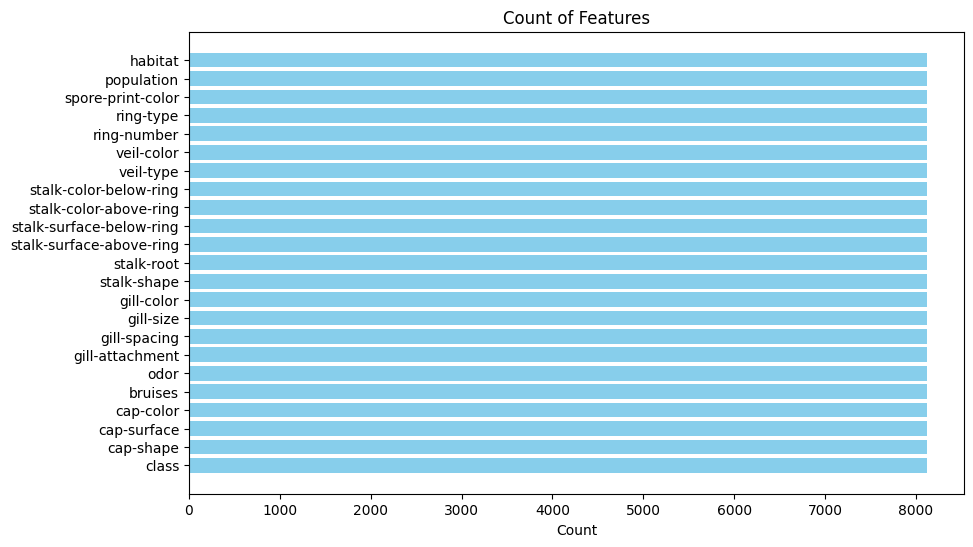

In [5]:
# Compute the total count for each column
column_counts = mushroom_data.apply(lambda x: x.value_counts().sum())

# Create a new figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a horizontal bar plot for the column counts
bars = ax.barh(column_counts.index, column_counts.values, color='skyblue')

# Set the labels and title for the plot
ax.set_xlabel('Count')
ax.set_title('Count of Features')

# Display the plot
plt.show()

In [6]:
# Display the count of unique values in the 'veil-type' column
print(mushroom_data['veil-type'].value_counts())

veil-type
p    8124
Name: count, dtype: int64


In [7]:
# Drop the 'veil-type' column from the dataframe
mushroom_data = mushroom_data.drop(['veil-type'], axis=1)

In [8]:
# Display the first few rows of the modified dataframe
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


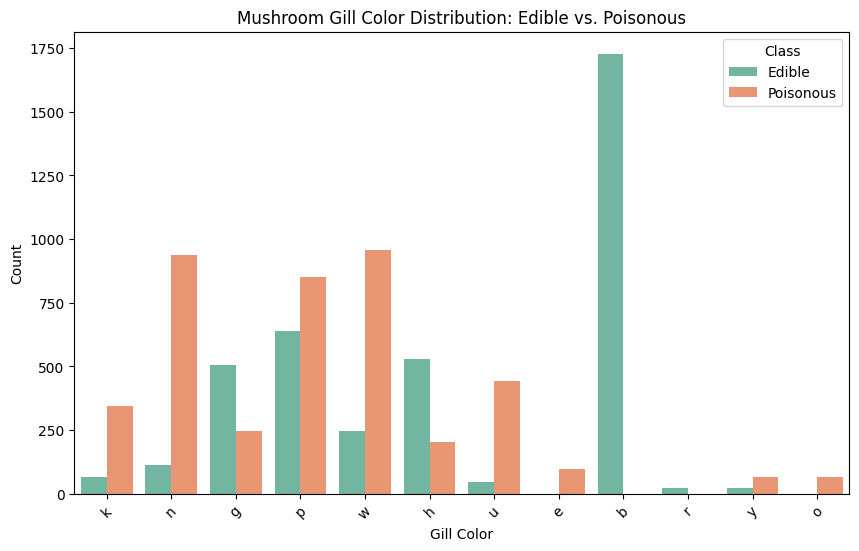

In [9]:
# Create a count plot for the 'gill-color' column, separated by 'class'
plt.figure(figsize=(10, 6))
sns.countplot(x='gill-color', hue='class', data=mushroom_data, palette='Set2')
plt.title('Mushroom Gill Color Distribution: Edible vs. Poisonous')
plt.xlabel('Gill Color')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=45)
plt.show()


c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


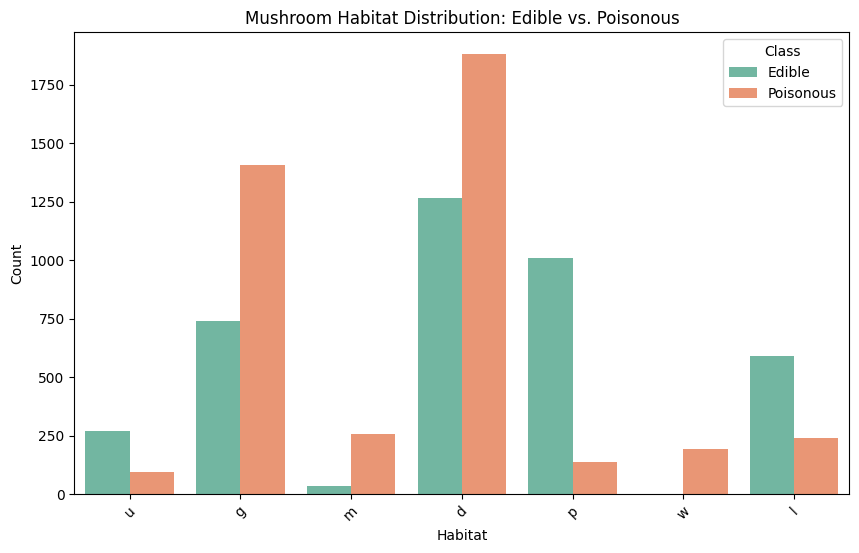

In [10]:
# Create a count plot for the 'habitat' column, separated by 'class'
plt.figure(figsize=(10, 6))
sns.countplot(x='habitat', hue='class', data=mushroom_data, palette='Set2')
plt.title('Mushroom Habitat Distribution: Edible vs. Poisonous')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=45)
plt.show()


c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


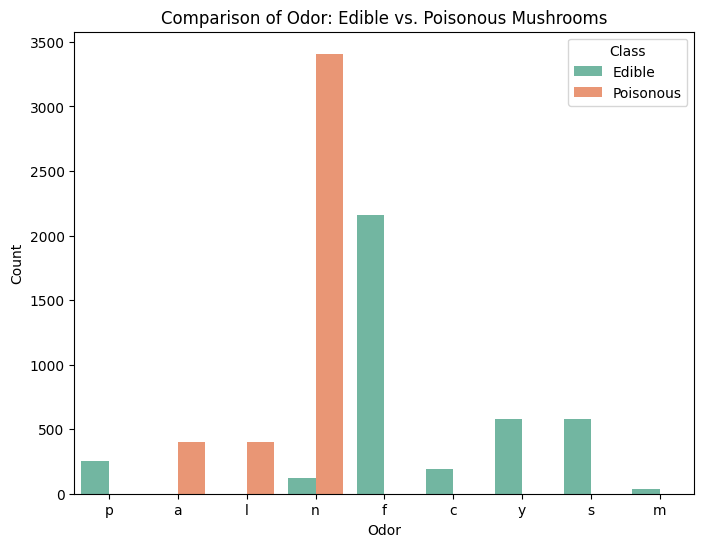

In [11]:
# Create a count plot for the 'odor' column, separated by 'class'
plt.figure(figsize=(8, 6))
sns.countplot(x='odor', hue='class', data=mushroom_data, palette='Set2')
plt.title('Comparison of Odor: Edible vs. Poisonous Mushrooms')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


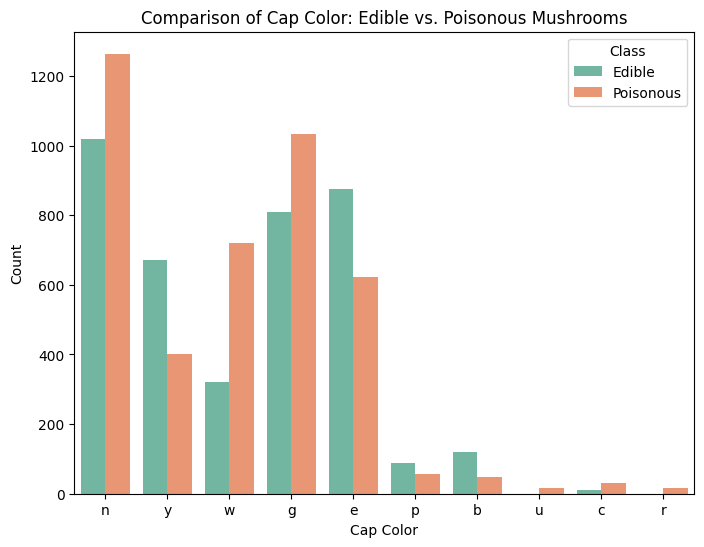

In [12]:
# Create a count plot for the 'cap-color' column, separated by 'class'
plt.figure(figsize=(8, 6))
sns.countplot(x='cap-color', hue='class', data=mushroom_data, palette='Set2')
plt.title('Comparison of Cap Color: Edible vs. Poisonous Mushrooms')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


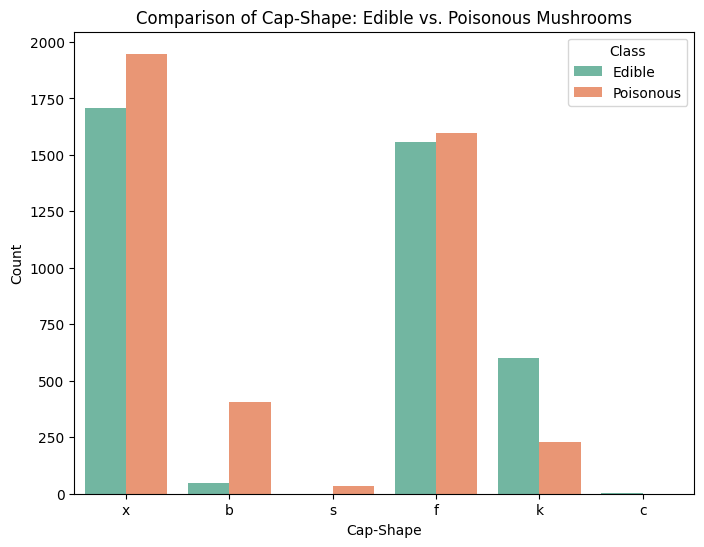

In [13]:
# Create a count plot for the 'cap-shape' column, separated by 'class'
plt.figure(figsize=(8, 6))
sns.countplot(x='cap-shape', hue='class', data=mushroom_data, palette='Set2')
plt.title('Comparison of Cap-Shape: Edible vs. Poisonous Mushrooms')
plt.xlabel('Cap-Shape')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


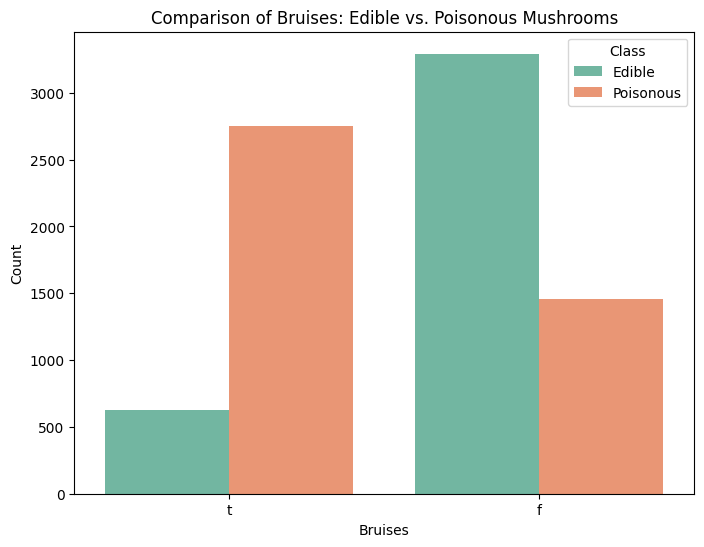

In [14]:
# Create a count plot for the 'bruises' column, separated by 'class'
plt.figure(figsize=(8, 6))
sns.countplot(x='bruises', hue='class', data=mushroom_data, palette='Set2')
plt.title('Comparison of Bruises: Edible vs. Poisonous Mushrooms')
plt.xlabel('Bruises')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

In [15]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [16]:
#convert features into category
mushroom_data= mushroom_data.astype('category')

In [17]:
# Instantiate the LabelEncoder
le = LabelEncoder()

# Loop over each column in the mushroom_data DataFrame
for column in mushroom_data.columns:
    # Use the LabelEncoder to transform each column
    # The fit_transform() method fits the label encoder and returns encoded labels
    mushroom_data[column] = le.fit_transform(mushroom_data[column])

In [18]:
#View the encoded data
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


<Axes: >

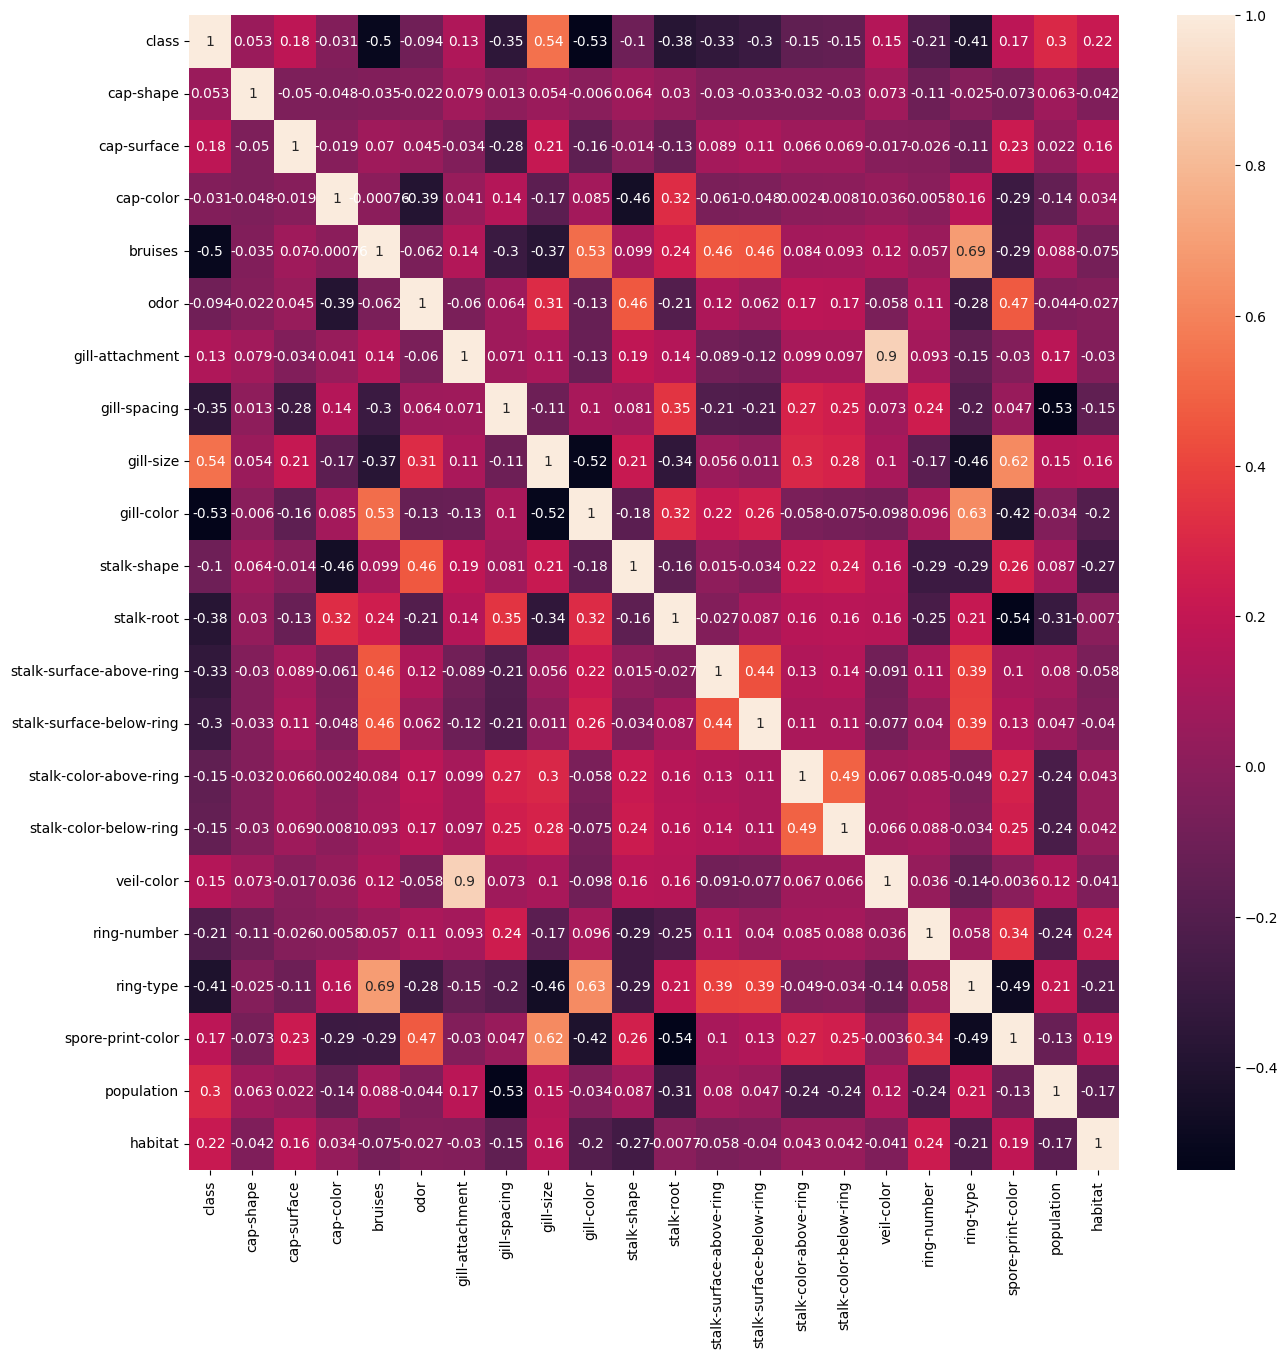

In [19]:
# Create a new figure with a specified size (15 by 15)
plt.figure(figsize=(15, 15))

# Compute the pairwise correlation of all columns in the mushroom_data DataFrame
# This returns a DataFrame where each cell represents the correlation between two columns
corr = mushroom_data.corr()

# Use seaborn's heatmap function to visualize the correlation matrix
# The 'annot=True' argument allows the actual correlation values to be written on the heatmap
sns.heatmap(corr, annot=True)

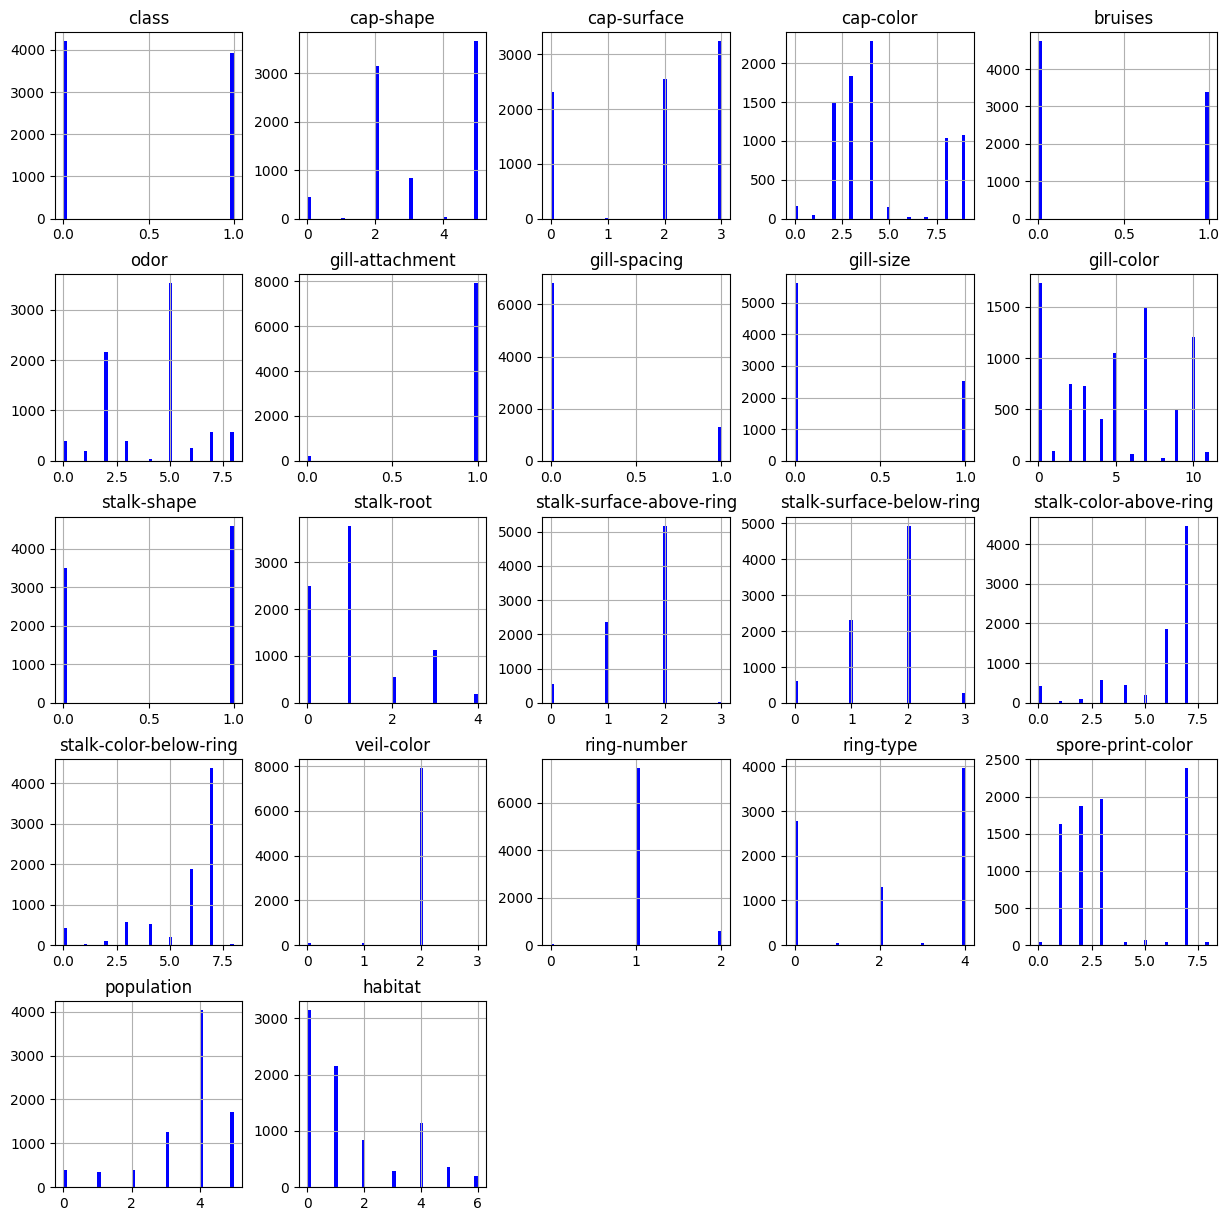

In [20]:
#View the distribution of the data
mushroom_data.hist(bins=50, figsize=(15,15), color= 'Blue',)
plt.show()

In [21]:
#split the data
y = mushroom_data['class']
X=mushroom_data.drop('class',axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,3,2,2,0,7,1,0,1,0,1,...,2,1,6,7,2,1,0,7,4,0
6515,5,2,4,0,2,1,0,1,0,1,...,1,2,7,7,2,1,0,7,4,4
6141,2,3,2,0,8,1,0,1,0,1,...,2,2,6,7,2,1,0,7,4,2
2764,2,0,4,1,5,1,0,0,9,1,...,2,2,3,6,2,1,4,3,4,0
438,0,3,9,1,3,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,5,3,4,0,2,1,0,1,0,1,...,1,2,6,7,2,1,0,7,4,4
5390,3,3,2,1,5,1,0,0,10,0,...,2,2,7,2,2,2,0,7,1,6
860,2,3,4,1,3,1,0,0,10,0,...,2,3,7,7,2,1,4,3,5,4
7603,3,2,2,0,2,1,0,1,0,1,...,2,2,6,6,2,1,0,7,4,4


In [26]:
# Logistic Regression model
# C is the inverse of regularization strength, smaller values specify stronger regularization
# 'saga' solver is a variant of Stochastic Average Gradient descent. It is fast for large datasets.
log_model = LogisticRegression(C=1,solver='saga')

# K-Nearest Neighbors model
# n_neighbors is the number of neighbors to use for kneighbors queries
# weights is the weight function used in prediction, 'uniform' means all points in each neighborhood are weighted equally
knn_model = KNeighborsClassifier(n_neighbors=5,weights='uniform')

# Support Vector Classifier model
# C is the regularization parameter, the strength of the regularization is inversely proportional to C
# 'rbf' stands for Radial basis function kernel
svc_model = SVC(C=1.0, kernel='rbf')

# Decision Tree model
# criterion is the function to measure the quality of a split, 'gini' for Gini impurity
# max_depth is the maximum depth of the tree
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=5)

# Random Forest model
# n_estimators is the number of trees in the forest
# criterion is the function to measure the quality of a split, 'gini' for Gini impurity
# max_depth is the maximum depth of the tree
rf_model = RandomForestClassifier(n_estimators=3,criterion='gini',max_depth=3)

# Gradient Boosting Classifier model
# n_estimators is the number of boosting stages to perform
# loss is the loss function to be optimized, 'log_loss' refers to logarithmic loss
# learning_rate shrinks the contribution of each tree by learning_rate
gbc_model = GradientBoostingClassifier(n_estimators=20,loss='log_loss',learning_rate=0.05)


In [27]:
# Fit the Logistic Regression model to the training data
# X_train is the training data
# y_train is the target variable for the training data
log_model.fit(X_train,y_train)

# Fit the K-Nearest Neighbors model to the training data
knn_model.fit(X_train,y_train)

# Fit the Support Vector Classifier model to the training data
svc_model.fit(X_train,y_train)

# Fit the Decision Tree model to the training data
dt_model.fit(X_train,y_train)

# Fit the Random Forest model to the training data
rf_model.fit(X_train,y_train)

# Fit the Gradient Boosting Classifier model to the training data
gbc_model.fit(X_train,y_train)


c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GradientBoostingClassifier(learning_rate=0.05, n_estimators=20)

In [28]:
# Make predictions using the Logistic Regression model on the test data
# X_test is the testing data
predictions_log = log_model.predict(X_test)

# Make predictions using the K-Nearest Neighbors model on the test data
predictions_knn = knn_model.predict(X_test)

# Make predictions using the Support Vector Classifier model on the test data
predictions_svc = svc_model.predict(X_test)

# Make predictions using the Decision Tree model on the test data
predictions_dt = dt_model.predict(X_test)

# Make predictions using the Random Forest model on the test data
predictions_rf = rf_model.predict(X_test)

# Make predictions using the Gradient Boosting Classifier model on the test data
predictions_gbc = gbc_model.predict(X_test)


In [29]:
#Check accuracy score
accuracy_log = accuracy_score(y_test, predictions_log)
print(f'The accuracy of the Logistic regression model is {accuracy_log*100:.2f}%')
accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f'The accuracy of the KNN model is {accuracy_knn*100:.2f}%')
accuracy_svc = accuracy_score(y_test, predictions_svc)
print(f'The accuracy of the SVC model is {accuracy_svc*100:.2f}%')
accuracy_dt = accuracy_score(y_test, predictions_dt)
print(f'The accuracy of the Decision Tree model is {accuracy_dt*100:.2f}%')
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f'The accuracy of the Random Forest model is {accuracy_rf*100:.2f}%')
accuracy_gbc = accuracy_score(y_test, predictions_gbc)
print(f'The accuracy of the Gradient Boost Classifier model is {accuracy_gbc*100:.2f}%')

The accuracy of the Logistic regression model is 94.89%
The accuracy of the KNN model is 99.63%
The accuracy of the SVC model is 99.38%
The accuracy of the Decision Tree model is 97.66%
The accuracy of the Random Forest model is 98.52%
The accuracy of the Gradient Boost Classifier model is 97.97%


In [30]:
# Create a DataFrame to store the accuracy of each model
final_data = pd.DataFrame({'Models':['LR','KNN','SVC','DT','RF','GBC'],
              'Accuracy':[accuracy_score(y_test,predictions_log)*100,
                          accuracy_score(y_test,predictions_knn)*100,
                          accuracy_score(y_test,predictions_svc)*100,
                          accuracy_score(y_test,predictions_dt)*100,
                          accuracy_score(y_test,predictions_rf)*100,
                          accuracy_score(y_test,predictions_gbc)*100,]})

C:\Users\T\AppData\Local\Temp\ipykernel_11480\3228427704.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=final_data['Models'], y=final_data['Accuracy'],palette='pastel')
c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

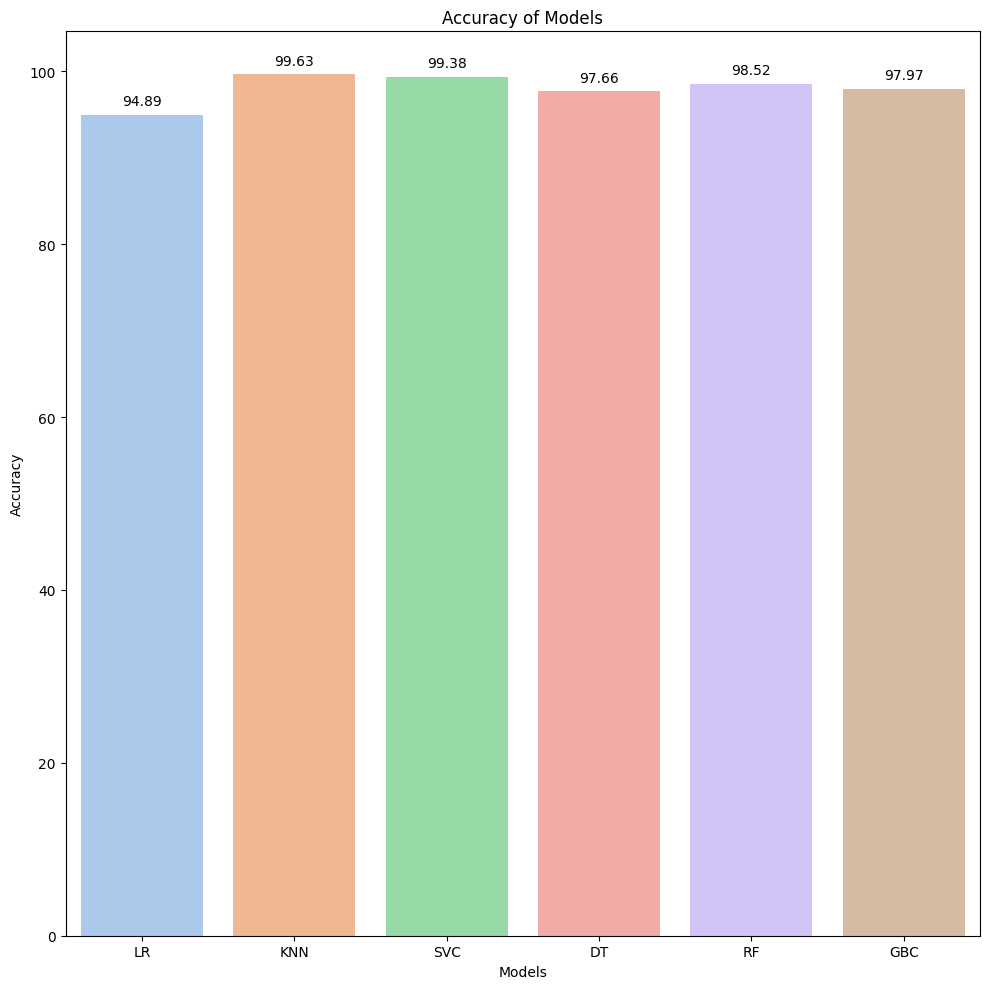

In [32]:
# Set the size of the figure
plt.figure(figsize=(10, 10))

# Generate a bar plot with 'Models' on the x-axis and 'Accuracy' on the y-axis
bar_plot = sns.barplot(x=final_data['Models'], y=final_data['Accuracy'],palette='pastel')

# Loop through each bar in the plot
for bar in bar_plot.patches:
    # Add a text annotation for each bar
    # The annotation is placed at the center of the bar and displays the height of the bar
    # The height of the bar represents the 'Accuracy'
    bar_plot.annotate(format(bar.get_height(), '.2f'), 
                      (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 10), 
                      textcoords='offset points')

# Set the title of the plot
plt.title('Accuracy of Models')

# Adjust the layout of the plot for better visualization
plt.tight_layout()

# Display the plot
plt.show()


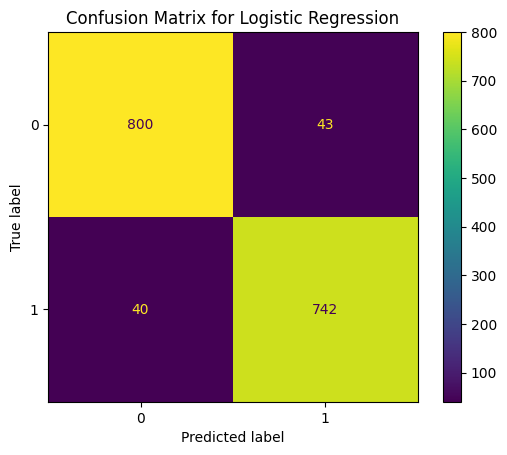

In [47]:
#Print confusion matrix for Logistic Regression
cm_log = confusion_matrix(y_test, predictions_log)
cmd_log = ConfusionMatrixDisplay(cm_log, display_labels=log_model.classes_)
cmd_log.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

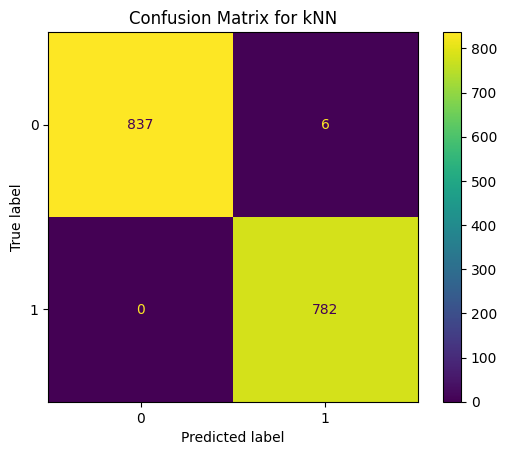

In [46]:
#Print confusion matrix for kNN model
cm_knn = confusion_matrix(y_test, predictions_knn)
cmd_knn = ConfusionMatrixDisplay(cm_knn, display_labels=knn_model.classes_)
cmd_knn.plot()
plt.title('Confusion Matrix for kNN')
plt.show()

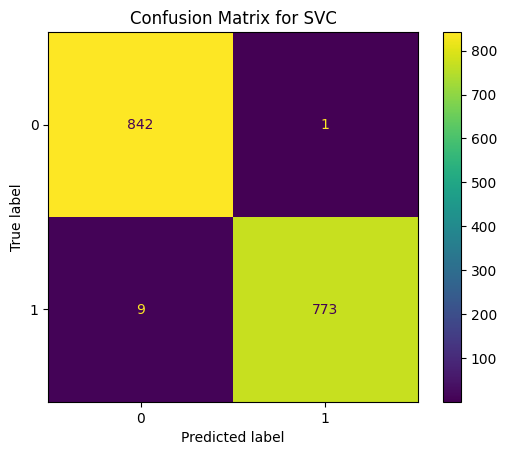

In [44]:
#Print confusion matrix for SVM model
cm_svc = confusion_matrix(y_test, predictions_svc)
cmd_svc = ConfusionMatrixDisplay(cm_svc, display_labels=svc_model.classes_)
cmd_svc.plot()
plt.title('Confusion Matrix for SVC')
plt.show()

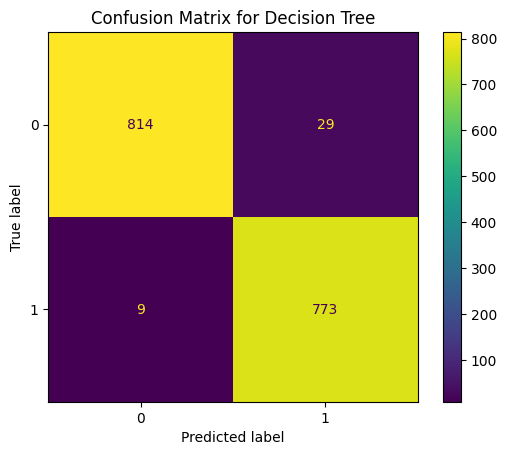

In [45]:
#Print confusion matrix for Decision Tree model
cm_dt = confusion_matrix(y_test, predictions_dt)
cmd_dt = ConfusionMatrixDisplay(cm_dt, display_labels=dt_model.classes_)
cmd_dt.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

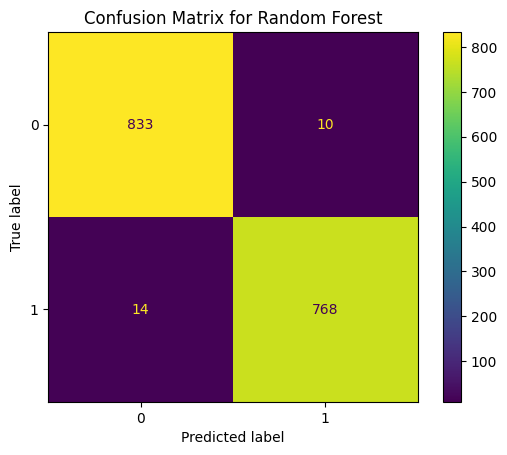

In [43]:
#Print confusion matrix for Random Forest model
cm_rf = confusion_matrix(y_test, predictions_rf)
cmd_rf = ConfusionMatrixDisplay(cm_rf, display_labels=rf_model.classes_)
cmd_rf.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

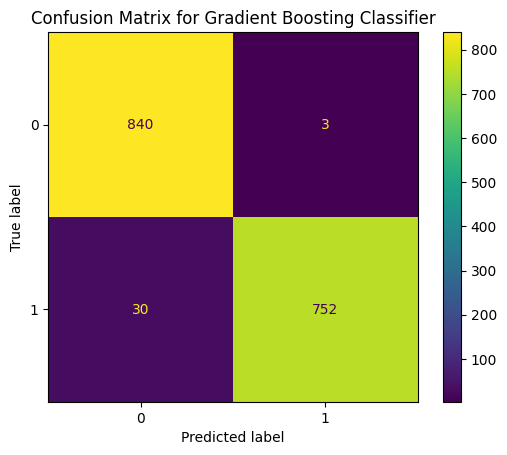

In [42]:
#Print confusion matrix for Gradient Boost Classifier model
cm_gbc = confusion_matrix(y_test, predictions_gbc)
cmd_gbc = ConfusionMatrixDisplay(cm_gbc, display_labels=gbc_model.classes_)
cmd_gbc.plot()
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

In [34]:
##Classification reports
print(classification_report(y_test, predictions_log))
print(classification_report(y_test, predictions_knn))
print(classification_report(y_test, predictions_svc))
print(classification_report(y_test, predictions_rf))
print(classification_report(y_test, predictions_dt))
print(classification_report(y_test, predictions_gbc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.95      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

              preci

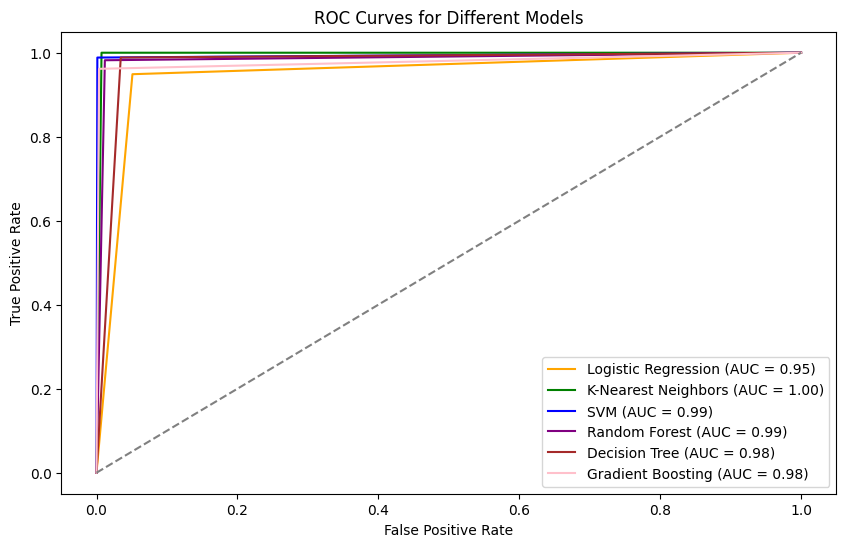

In [36]:
# Calculate AUC for each model (you've already done this)
auc_log = roc_auc_score(y_test, predictions_log)
auc_knn = roc_auc_score(y_test, predictions_knn)
auc_svm = roc_auc_score(y_test, predictions_svc)
auc_rf = roc_auc_score(y_test, predictions_rf)
auc_dt = roc_auc_score(y_test, predictions_dt)
auc_gbc = roc_auc_score(y_test, predictions_gbc)

# Compute ROC curves for each model (you've already done this)
fpr_log, tpr_log, _ = roc_curve(y_test, predictions_log)
fpr_knn, tpr_knn, _ = roc_curve(y_test, predictions_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, predictions_svc)
fpr_rf, tpr_rf, _ = roc_curve(y_test, predictions_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, predictions_dt)
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, predictions_gbc)


# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, color='orange', label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', label=f'K-Nearest Neighbors (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='purple', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, color='brown', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_gbc, tpr_gbc, color='pink', label=f'Gradient Boosting (AUC = {auc_gbc:.2f})')

# Add a diagonal line for reference
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()

# Show the plot
plt.show()
